In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\Bogere\OneDrive\Desktop\Research Project\NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

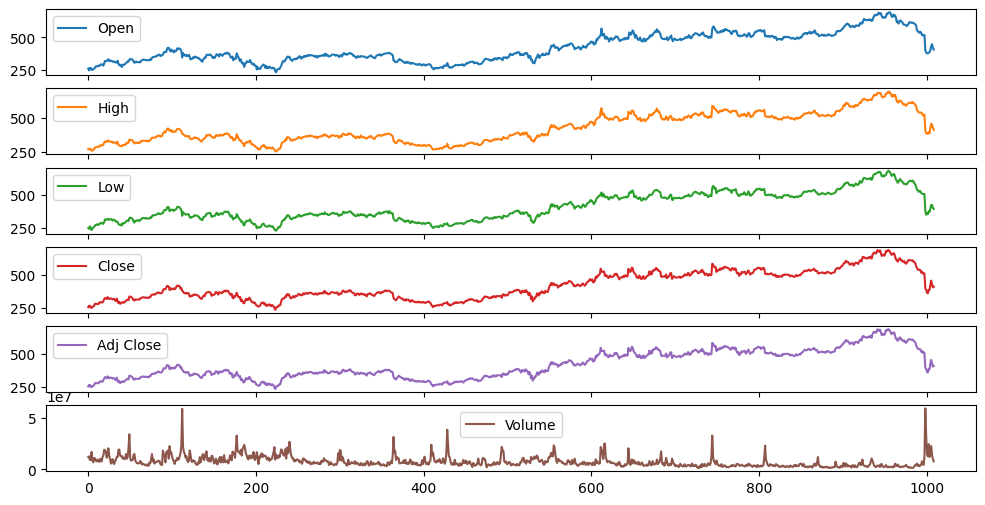

In [6]:
import matplotlib.pyplot as plt
df.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()

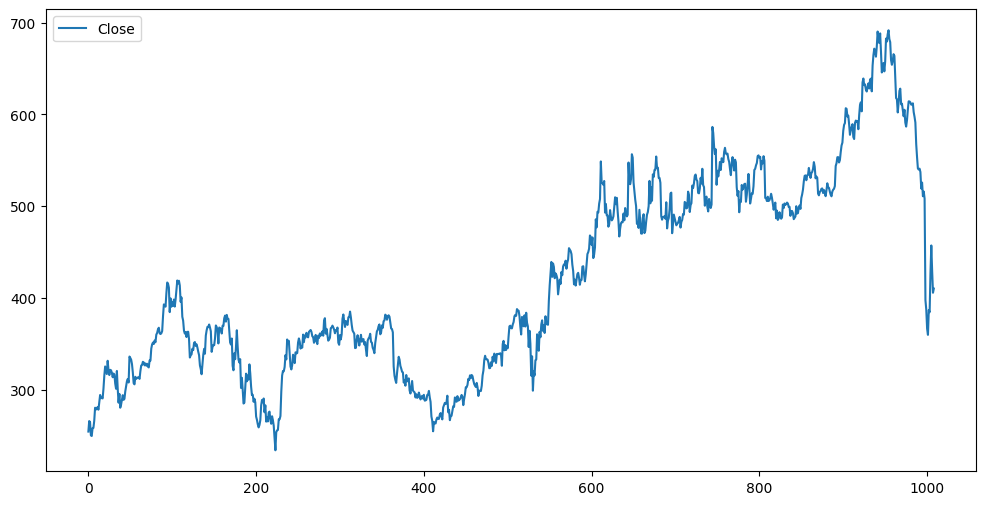

In [7]:
df['Close'].plot(legend=True, figsize = (12, 6))
plt.show()

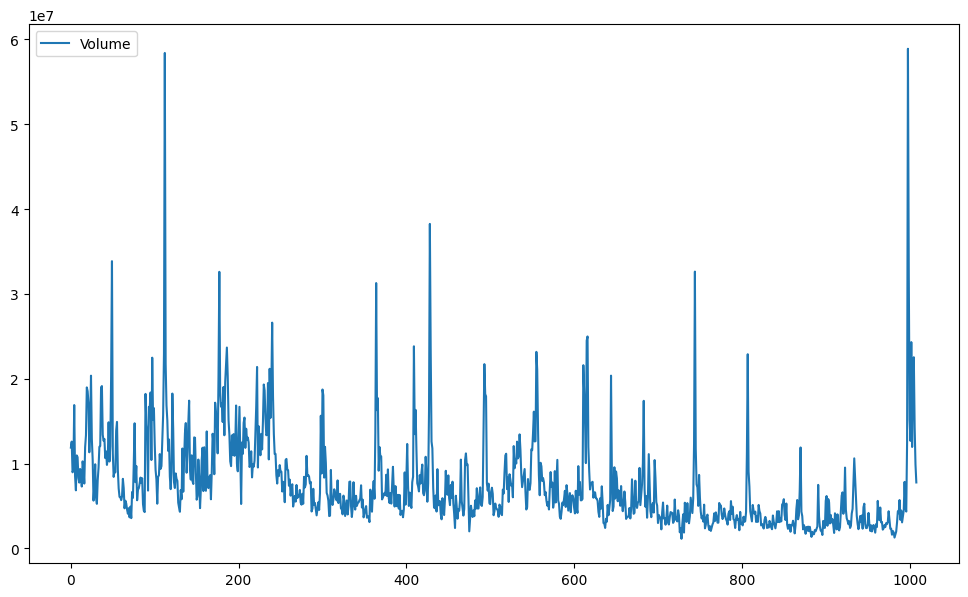

In [8]:
df['Volume'].plot(legend=True,figsize=(12,7))
plt.show()

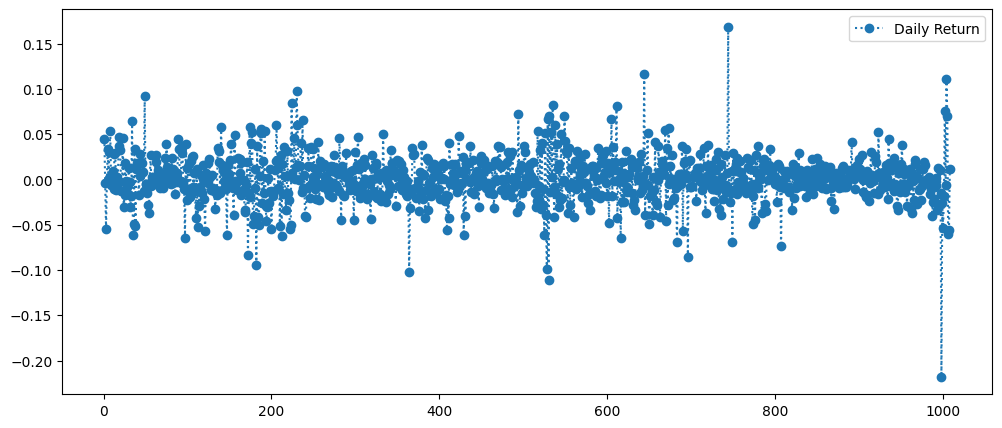

In [9]:
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df[column_name]=pd.DataFrame.rolling(df['Close'],ma).mean()

df['Daily Return'] = df['Close'].pct_change()
# plot the daily return percentage
df['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

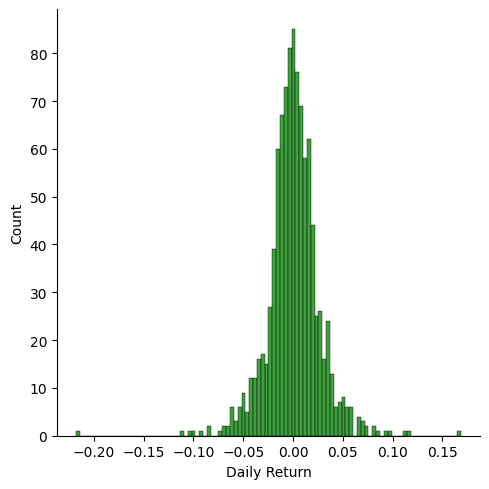

In [10]:
import seaborn as sns
sns.displot(df['Daily Return'].dropna(),bins=100,color='green')
plt.show()

In [11]:
date=pd.DataFrame(df['Date'])
closing_df1 = pd.DataFrame(df['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

,Date,data_close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001


In [12]:
df.reset_index(drop=True, inplace=True)
df.fillna(df.mean(), inplace=True)
df.head()

C:\Users\Bogere\AppData\Local\Temp\ipykernel_7776\581692886.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


,Date,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 50 days,MA for 100 days,Daily Return
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,419.748001,420.197913,417.405502,0.000831
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,419.748001,420.197913,417.405502,0.045072
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,419.748001,420.197913,417.405502,-0.004366
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,419.748001,420.197913,417.405502,-0.054657
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,419.748001,420.197913,417.405502,-0.002519


In [13]:
df.nunique()

Date               1009
Open                976
High                983
Low                 989
Close               988
Adj Close           988
Volume             1005
MA for 10 days     1001
MA for 50 days      961
MA for 100 days     911
Daily Return       1009
dtype: int64

In [14]:
df.sort_index(axis=1,ascending=True)

,Adj Close,Close,Daily Return,Date,High,Low,MA for 10 days,MA for 100 days,MA for 50 days,Open,Volume
0,254.259995,254.259995,0.000831,2018-02-05,267.899994,250.029999,419.748001,417.405502,420.197913,262.000000,11896100
1,265.720001,265.720001,0.045072,2018-02-06,266.700012,245.000000,419.748001,417.405502,420.197913,247.699997,12595800
2,264.559998,264.559998,-0.004366,2018-02-07,272.450012,264.329987,419.748001,417.405502,420.197913,266.579987,8981500
3,250.100006,250.100006,-0.054657,2018-02-08,267.619995,250.000000,419.748001,417.405502,420.197913,267.079987,9306700
4,249.470001,249.470001,-0.002519,2018-02-09,255.800003,236.110001,419.748001,417.405502,420.197913,253.850006,16906900
...,...,...,...,...,...,...,...,...,...,...,...
1004,427.140015,427.140015,0.111302,2022-01-31,427.700012,398.200012,424.388000,600.807798,568.949401,401.970001,20047500
1005,457.130005,457.130005,0.070211,2022-02-01,458.480011,425.540009,419.021002,599.403698,564.451600,432.959991,22542300
1006,429.480011,429.480011,-0.060486,2022-02-02,451.980011,426.480011,410.383005,597.711299,559.465201,448.250000,14346000
1007,405.600006,405.600006,-0.055602,2022-02-03,429.260010,404.279999,400.118005,595.874399,554.393201,421.440002,9905200


            Date        Open        High         Low       Close   Adj Close  \
0     2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1     2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2     2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3     2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4     2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  MA for 10 days  MA for 

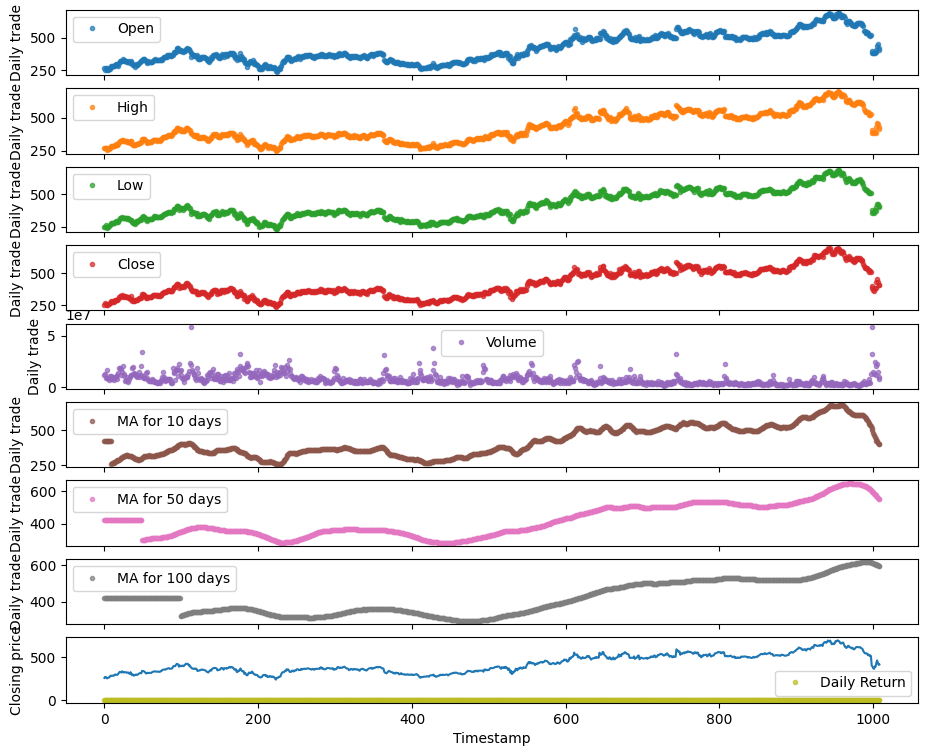

In [15]:
cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = df[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(df['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = df
print(df)

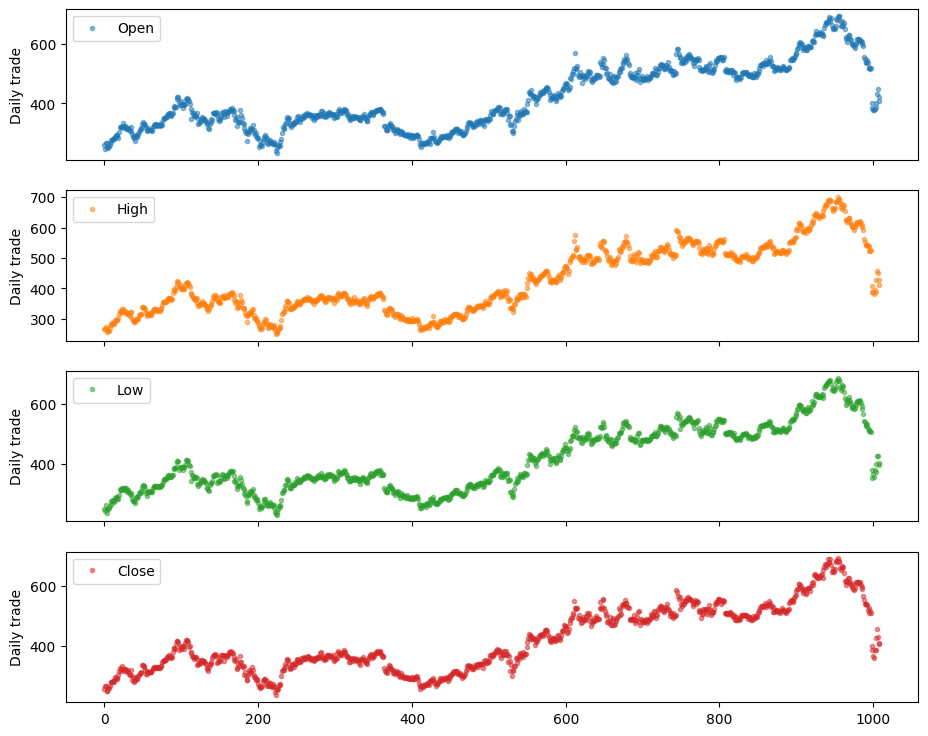

In [16]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

            Date        Open        High         Low       Close   Adj Close  \
0     2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1     2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2     2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3     2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4     2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  MA for 10 days  MA for 

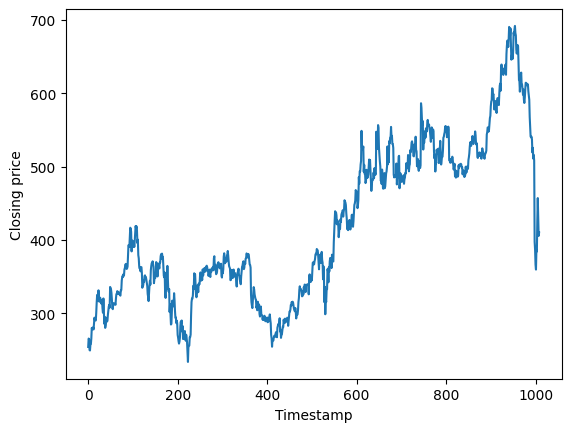

In [17]:
plt.plot(df['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df1 = df
print(df)

In [18]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07
MA for 10 days,1009.0,4.197480e+02,1.068785e+02,2.573520e+02,3.347150e+02,3.766230e+02,5.131080e+02,6.747820e+02
MA for 50 days,1009.0,4.201979e+02,1.014615e+02,2.809368e+02,3.413424e+02,3.766312e+02,5.067056e+02,6.485930e+02
MA for 100 days,1009.0,4.174055e+02,9.218568e+01,2.928746e+02,3.381168e+02,4.008090e+02,5.099490e+02,6.167718e+02
Daily Return,1009.0,8.307950e-04,2.659007e-02,-2.179046e-01,-1.192096e-02,6.858891e-04,1.453468e-02,1.685434e-01


In [19]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

725
182


In [20]:
# For creating model and training
import keras
import tensorflow as tf
from keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from keras.layers import MaxPooling1D, Flatten
from keras.regularizers import L1, L2
from keras.metrics import Accuracy
from keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

In [21]:
###Creating the Neural Network model with CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))

In [22]:
### LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

In [23]:
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
19/19 [==============================] - 18s 195ms/step - loss: 0.0256 - mse: 0.0256 - mae: 0.1254 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.1080
Epoch 2/40
19/19 [==============================] - 1s 43ms/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0896 - val_loss: 0.0113 - val_mse: 0.0113 - val_mae: 0.0872
Epoch 3/40
19/19 [==============================] - 1s 43ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0793 - val_loss: 0.0091 - val_mse: 0.0091 - val_mae: 0.0762
Epoch 4/40
19/19 [==============================] - 1s 43ms/step - loss: 0.0089 - mse: 0.0089 - mae: 0.0737 - val_loss: 0.0093 - val_mse: 0.0093 - val_mae: 0.0754
Epoch 5/40
19/19 [==============================] - 1s 44ms/step - loss: 0.0091 - mse: 0.0091 - mae: 0.0740 - val_loss: 0.0082 - val_mse: 0.0082 - val_mae: 0.0735
Epoch 6/40
19/19 [==============================] - 1s 44ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0689 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0732
Epoch 7/40
19/19 [==

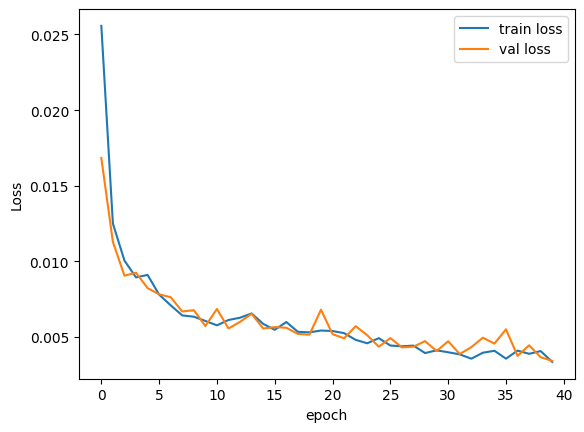

In [24]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

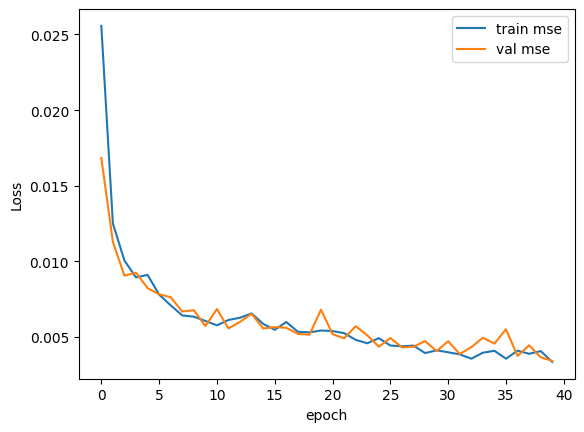

In [25]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

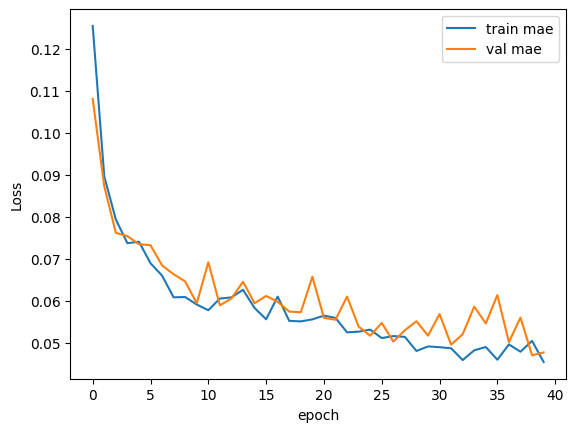

In [26]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [27]:
from keras.utils import plot_model
import pydot
import graphviz
print(model.summary())
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

In [28]:
model.evaluate(test_X, test_Y)

6/6 [==============================] - 0s 14ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0477


[0.0034308498725295067, 0.0034308498725295067, 0.04768845811486244]

In [29]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

In [30]:
# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)

In [31]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.916220
R2 Score: 0.916220
Max Error: 0.154481


6/6 [==============================] - 0s 13ms/step


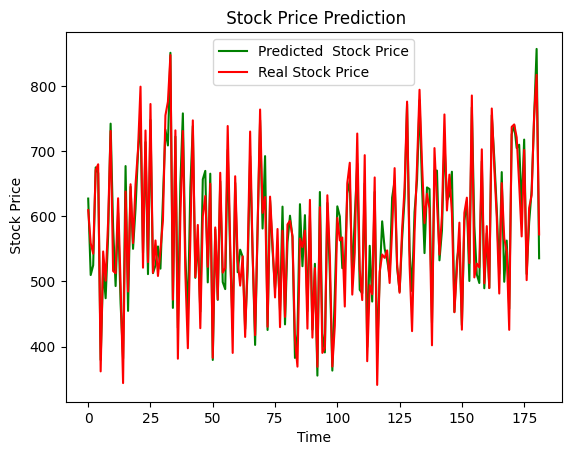

In [32]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = df.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()